In [1]:
import random

class Chromosome():
    def __init__(self, x, y, сoefficients = []):
        self.x = x
        self.y = y
        self.сoefficients = сoefficients
        self.fitness = None
        
    def RandomInit(self, PolynomialDegree, InitBounds):
        self.сoefficients = []
        for _ in range(PolynomialDegree+1):
            self.сoefficients.append(random.uniform(InitBounds[0], InitBounds[1]))
    
    def GetFF(self):
        if self.fitness == None:
            self.EvaluateFF()
        return self.fitness
    
    def EvaluateFF(self):
        self.fitness = 0
        for i in range(len(self.x)):
            self.fitness += abs(self.y[i] - self.RegrModel(self.x[i]))
        self.fitness /= len(self.x)
            
    def RegrModel(self, x):
        res = 0
        for i in range(len(self.сoefficients)):
            res += self.сoefficients[i] * x**i
        return res
            
    def Crossing(self, other):
        BitMask = [random.choice([0, 1]) for _ in range(len(self.сoefficients))]
        ParentCoefficients = [self.сoefficients, other.сoefficients]
        сoefficients1 = [ParentCoefficients[BitMask[i]][i] for i in range(len(self.сoefficients))]
        сoefficients2 = [ParentCoefficients[not BitMask[i]][i] for i in range(len(self.сoefficients))]
        child1 = Chromosome(self.x, self.y, сoefficients1)
        child2 = Chromosome(self.x, self.y, сoefficients2)
        return (child1, child2)
    
    def Mutate(self, MutateBounds, MutateProb):
        for i in range(len(self.сoefficients)):
            if random.random() < MutateProb:
                self.сoefficients[i] += random.uniform(MutateBounds[0], MutateBounds[1])

In [2]:
class GeneticAlgorithm():
    def __init__(self, x, y, PopSize = 50, MutateProb = 0.1, PolynomialDegree = 1, 
                 InitBounds = (-10, 10), MutateBounds = (-3, 3), GenLimit = 1000, Elite = 15):
        self.x = x
        self.y = y
        self.PopSize = PopSize
        self.MutateProb = MutateProb
        self.PolynomialDegree = PolynomialDegree
        self.InitBounds = InitBounds
        self.MutateBounds = MutateBounds
        self.Population = []
        self.TempPop = []
        self.GenLimit = GenLimit
        self.GenNum = 0
        self.history = []
        self.Elite = Elite
        self.BestInEachGen = []
        
    def Run(self):
        if self.Population == []:
            self.StartPopInit()
        for i in range(self.GenLimit):
            self.EvalPopFF()
            self.history.append(self.MeanFF())
            self.BestInEachGen.append(self.Population[0])
            self.CrossOver()
            self.Mutation()
            self.NextGen()
            self.GenNum += 1
            
    def StartPopInit(self):
        self.Population = [Chromosome(self.x, self.y) for _ in range(self.PopSize)]
        for i in range(self.PopSize):
            self.Population[i].RandomInit(self.PolynomialDegree, self.InitBounds)
            
    def EvalPopFF(self):
        for i in range(self.PopSize):
            self.Population[i].EvaluateFF()
            
    def CrossOver(self):
        self.TempPop = []
        for i in range(self.PopSize):
            parents = self.Selection()
            childs = parents[0].Crossing(parents[1])
            for i in range(len(childs)):
                self.TempPop.append(childs[i])
            
    def Selection(self):
        Weights = [1/(i+2) for i in range(self.PopSize)]
        return random.choices(self.Population, weights = Weights, k = 2)
    
    def Mutation(self):
        for i in range(self.PopSize):
            self.TempPop[i].Mutate(self.MutateBounds, self.MutateProb)
            
    def NextGen(self):
        sorted(self.Population, key = lambda x: x.GetFF())
        sorted(self.TempPop, key = lambda x: x.GetFF())
        j = 0
        for i in range(self.Elite):
            if self.TempPop[j].GetFF() <= self.Population[i].GetFF():
                self.Population[i] = self.TempPop[j]
                j+=1
        for i in range(self.Elite, self.PopSize):
            self.Population[i] = self.TempPop[j]
            j+=1
    
    def MeanFF(self):
        return sum([Ind.GetFF() for Ind in self.Population])/self.PopSize

In [3]:
def func(x):
    return x + 5

DataSize = 20
x = [i for i in range(DataSize)]
y = [func(x[i]) + random.random() for i in range(DataSize)]

In [4]:
GA = GeneticAlgorithm(x, y, PopSize = 100, MutateProb = 0.1, PolynomialDegree = 1,
                      InitBounds = (-5, 5), MutateBounds = (-3, 3), GenLimit = 200, Elite = 70)
GA.Run()

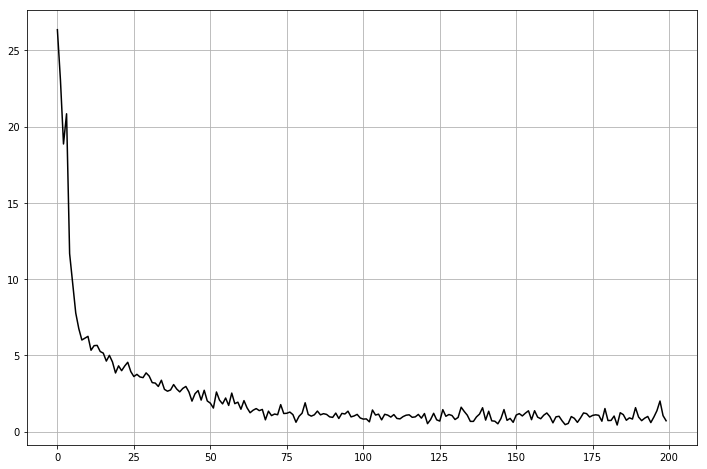

In [9]:
import matplotlib.pyplot as plt

start = 0
stop = len(GA.history)

fig = plt.figure(figsize=(12,8))
graph0 = plt.plot([i for i in range(start, stop)], GA.history[start:stop], color = 'black')
grid1 = plt.grid(True)
plt.show()